## Loading

In [33]:
import pandas as pd
import tarfile
import matplotlib.pyplot as plt

In [36]:
file_path = 'data/matched_beer_data.tar.gz'
with tarfile.open(file_path, 'r:gz') as tar:
    tar.extractall(path='../data')  
    tar.list()

?rwxrwxrwx gayouf/gayouf   26775015 2017-08-10 17:15:37 ratings.csv 
?rw-rw-r-- gayouf/gayouf   99396732 2018-03-19 14:13:29 ratings_ba.txt.gz 
?rw-rw-r-- gayouf/gayouf  133634318 2018-03-19 14:22:54 ratings_rb.txt.gz 
?rwxrwxrwx gayouf/gayouf     533538 2017-08-08 15:35:54 users_approx.csv 
?rwxrwxrwx gayouf/gayouf     429785 2017-08-07 14:51:08 users.csv 
?rwxrwxrwx gayouf/gayouf   14246582 2018-03-19 14:26:49 beers.csv 
?rwxrwxrwx gayouf/gayouf    1045044 2017-08-02 18:10:05 breweries.csv 
?rw-rw-r-- gayouf/gayouf   77201217 2018-03-20 21:16:35 ratings_with_text_ba.txt.gz 
?rw-rw-r-- gayouf/gayouf  133632940 2018-03-20 21:25:56 ratings_with_text_rb.txt.gz 


In [52]:
ratings = pd.read_csv('../data/ratings.csv')
ratings_ba = pd.read_csv('../data/ratings_ba.txt.gz', compression='gzip', delimiter='\t')
ratings_rb = pd.read_csv('../data/ratings_rb.txt.gz', compression='gzip', delimiter='\t')
users_approx = pd.read_csv('../data/users_approx.csv')
users = pd.read_csv('../data/users.csv')
beers = pd.read_csv('../data/beers.csv')
breweries = pd.read_csv('../data/breweries.csv')
ratings_with_text_ba = pd.read_csv('../data/ratings_with_text_ba.txt.gz', compression='gzip', delimiter='\t')
ratings_with_text_rb = pd.read_csv('../data/ratings_with_text_rb.txt.gz', compression='gzip', delimiter='\t')

/var/folders/9b/th5400l94kqcyysbyv63p_bm0000gn/T/ipykernel_60977/3681835887.py:1: DtypeWarning: Columns (0,1,2,3,5,7,8,9,10,11,13,17,18,19,20,22,24,25,26,27,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  ratings = pd.read_csv('../data/ratings.csv')
/var/folders/9b/th5400l94kqcyysbyv63p_bm0000gn/T/ipykernel_60977/3681835887.py:6: DtypeWarning: Columns (0,1,2,3,4,5,8,10,11,12,13,15,16,17,18,19,20,23,25,26,27,29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  beers = pd.read_csv('../data/beers.csv')


## Countries

### For users

In [53]:
users

,ba,ba.1,ba.2,ba.3,ba.4,ba.5,ba.6,rb,rb.1,rb.2,rb.3,rb.4,rb.5
0,joined,location,nbr_ratings,nbr_reviews,user_id,user_name,user_name_lower,joined,location,nbr_ratings,user_id,user_name,user_name_lower
1,1220868000.0,Germany,6,6,erzengel.248045,Erzengel,erzengel,1224324000.0,Germany,8781,83106,Erzengel,erzengel
2,1348394400.0,"United States, Virginia",1,1,gendv138.695700,GenDV138,gendv138,1385722800.0,"United States, Virginia",6240,290599,GenDV138,gendv138
3,1207303200.0,"United States, Washington",3,3,nimbleprop.208928,nimbleprop,nimbleprop,1150797600.0,"United States, Washington",7452,38859,nimbleprop,nimbleprop
4,1322737200.0,Estonia,11,0,visionthing.639993,visionthing,visionthing,1242986400.0,Estonia,5462,91324,visionthing,visionthing
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3016,1253181600.0,"United States, Pennsylvania",398,398,shadesofgray.371155,ShadesOfGray,shadesofgray,1261998000.0,"United States, Pennsylvania",1,99346,ShadesOfGray,shadesofgray
3017,1095847200.0,"United States, Michigan",587,587,ypsifly.8833,ypsifly,ypsifly,1139569200.0,"United States, Michigan",1,33393,ypsifly,ypsifly
3018,1047121200.0,"United States, Texas",1379,1379,hardtarget.1712,HardTarget,hardtarget,1095933600.0,"United States, Texas",1,15553,HardTarget,hardtarget
3019,1416740400.0,Vietnam,176,24,nelsonsaigon.897449,nelsonsaigon,nelsonsaigon,1406368800.0,Vietnam,1,327965,nelsonsaigon,nelsonsaigon


In [58]:
users_merged = users.rename(columns={
    'ba': 'joined.0',
    'ba.1': 'location.0',
    'ba.2': 'nbr_ratings.0',
    'ba.3': 'nbr_reviews.0',
    'ba.4': 'user_id.0',
    'ba.5': 'user_name.0',
    'ba.6': 'user_name_lower.0',
    'rb': 'joined.1',
    'rb.1': 'location.1',
    'rb.2': 'nbr_ratings.1',
    'rb.3': 'nbr_reviews.1',
    'rb.4': 'user_id.1',
    'rb.5': 'user_name.1'
})

In [60]:
users_merged = users_merged.drop(index=0).reset_index(drop=True)

In [61]:
users_merged

,joined.0,location.0,nbr_ratings.0,nbr_reviews.0,user_id.0,user_name.0,user_name_lower.0,joined.1,location.1,nbr_ratings.1,nbr_reviews.1,user_id.1,user_name.1,country
0,1220868000.0,Germany,6,6,erzengel.248045,Erzengel,erzengel,1224324000.0,Germany,8781,83106,Erzengel,erzengel,Germany
1,1348394400.0,"United States, Virginia",1,1,gendv138.695700,GenDV138,gendv138,1385722800.0,"United States, Virginia",6240,290599,GenDV138,gendv138,United States
2,1207303200.0,"United States, Washington",3,3,nimbleprop.208928,nimbleprop,nimbleprop,1150797600.0,"United States, Washington",7452,38859,nimbleprop,nimbleprop,United States
3,1322737200.0,Estonia,11,0,visionthing.639993,visionthing,visionthing,1242986400.0,Estonia,5462,91324,visionthing,visionthing,Estonia
4,1432116000.0,England,1,0,lazypyro.989356,LazyPyro,lazypyro,1431165600.0,England,1096,368991,LazyPyro,lazypyro,England
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3015,1253181600.0,"United States, Pennsylvania",398,398,shadesofgray.371155,ShadesOfGray,shadesofgray,1261998000.0,"United States, Pennsylvania",1,99346,ShadesOfGray,shadesofgray,United States
3016,1095847200.0,"United States, Michigan",587,587,ypsifly.8833,ypsifly,ypsifly,1139569200.0,"United States, Michigan",1,33393,ypsifly,ypsifly,United States
3017,1047121200.0,"United States, Texas",1379,1379,hardtarget.1712,HardTarget,hardtarget,1095933600.0,"United States, Texas",1,15553,HardTarget,hardtarget,United States
3018,1416740400.0,Vietnam,176,24,nelsonsaigon.897449,nelsonsaigon,nelsonsaigon,1406368800.0,Vietnam,1,327965,nelsonsaigon,nelsonsaigon,Vietnam


In [62]:
# Removing the states to only have the countries
users_merged['country'] = users_merged['location.0'].str.split(',').str[0]

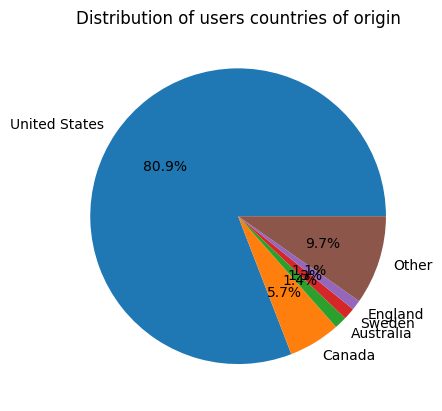

In [63]:
# Compute the number of users in the top 5 countries
top10_countries = users_merged['country'].value_counts().nlargest(5)

# Compute the sum of the remaining countries
other_countries = users_merged['country'].value_counts().sum() - top10_countries.sum()

# Add the other countries count
top_countries = pd.concat([top10_countries, pd.Series({'Other': other_countries})])

# Plot the pie chart
top_countries.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of users countries of origin')
plt.ylabel('')
plt.show()

In [64]:
top10_countries

country
United States    2442
Canada            171
Australia          41
Sweden             39
England            33
Name: count, dtype: int64

80.8% of the users originate from the United States, in particularly there are 2442 users from this country.


Number of ratings per country


In [77]:
users_merged['nbr_ratings.1'] = pd.to_numeric(users_merged['nbr_ratings.1'], errors='coerce')
users_merged['nbr_ratings.0'] = pd.to_numeric(users_merged['nbr_ratings.0'], errors='coerce')

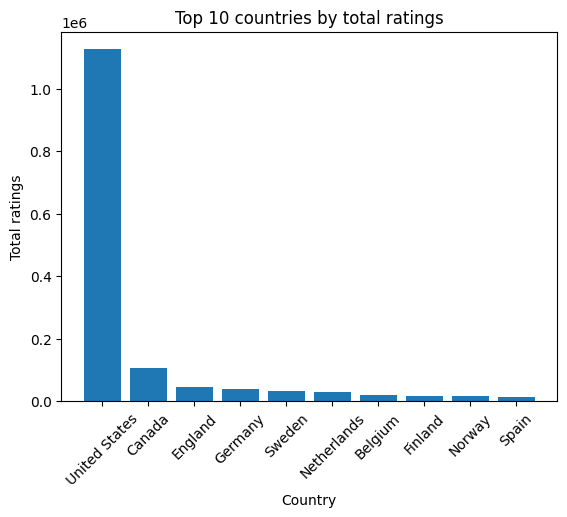

In [80]:
# Compute the sum of the number of ratings from the two website
users_merged['total_ratings'] = users_merged['nbr_ratings.0'] + users_merged['nbr_ratings.1']

# Regroup the number of ratings by countries
country_ratings = users_merged.groupby('country')['total_ratings'].sum().reset_index()

# Get the top 10 countries
top_countries = country_ratings.nlargest(10, 'total_ratings')

# Bar plot
plt.bar(top_countries['country'], top_countries['total_ratings'])
plt.xlabel('Country')
plt.ylabel('Total ratings')
plt.title('Top 10 countries by total ratings')
plt.xticks(rotation=45)
plt.show()